In [111]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

### Task Description

Fraud patterns often hide in behavior rather than individual transactions. This is to generate features that capture behavioral, time-based, and geographic tendencies, then explore how they differ between legitimate and fraudulent activity.

EDA & Featuring Engineering 
1. Target Inspection 
. check is_fraud class balance to assess imbalance 

2. Univariate EDA 
 . Num: amount, fee, scores, velocities; distributions, outliers 
 . Cat: channel, currencies, kyc_tier ; counts

 3. Bivariate EDA
  . Fraud rates by channel, country, kyc_tier, time-of-day, etc

  4. Feature Engineering 
  . Time-based: hour, day-of-week, weekend
  . Amount-based: log(amount), fee_ration,high-risk flags.
  . Behavioural: velocity ratios, flags from historical behavior
  . Categorical:one-hot, ordinal, or target encoding.
  


In [112]:
df=pd.read_csv("cleaned_transactions.csv")

In [113]:
df.shape

(10780, 26)

In [114]:
df.isna().sum()

transaction_id               0
customer_id                  0
timestamp                    0
home_country                 0
source_currency              0
dest_currency                0
channel                      0
amount_src                   0
amount_usd                   0
fee                          0
exchange_rate_src_to_dest    0
device_id                    0
new_device                   0
ip_address                   0
ip_country                   0
location_mismatch            0
ip_risk_score                0
kyc_tier                     0
account_age_days             0
device_trust_score           0
chargeback_history_count     0
risk_score_internal          0
txn_velocity_1h              0
txn_velocity_24h             0
corridor_risk                0
is_fraud                     0
dtype: int64

In [115]:
#check datetime data type
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             10780 non-null  str    
 1   customer_id                10780 non-null  str    
 2   timestamp                  10780 non-null  str    
 3   home_country               10780 non-null  str    
 4   source_currency            10780 non-null  str    
 5   dest_currency              10780 non-null  str    
 6   channel                    10780 non-null  str    
 7   amount_src                 10780 non-null  float64
 8   amount_usd                 10780 non-null  float64
 9   fee                        10780 non-null  float64
 10  exchange_rate_src_to_dest  10780 non-null  float64
 11  device_id                  10780 non-null  str    
 12  new_device                 10780 non-null  bool   
 13  ip_address                 10780 non-null  str    
 14  i

In [116]:
# correlational analysis between the numerical figures and the main target
df.corr(numeric_only=True)["is_fraud"]. sort_values(ascending=False)

is_fraud                     1.000000
txn_velocity_24h             0.759866
txn_velocity_1h              0.698681
risk_score_internal          0.612653
ip_risk_score                0.591583
chargeback_history_count     0.585117
location_mismatch            0.428793
new_device                   0.389261
corridor_risk                0.198449
exchange_rate_src_to_dest    0.154757
amount_usd                   0.131411
amount_src                   0.130744
fee                          0.130538
account_age_days            -0.291430
device_trust_score          -0.440364
Name: is_fraud, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

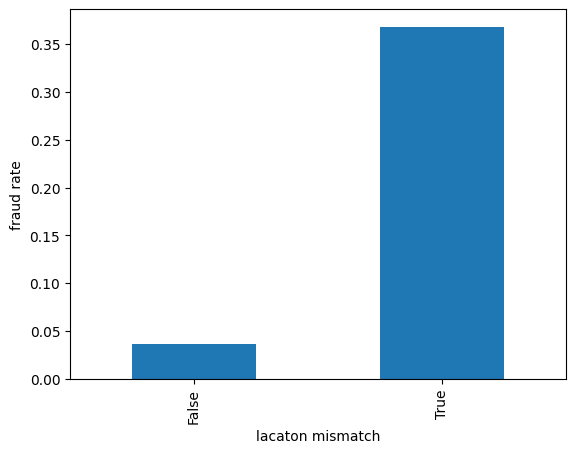

In [117]:
# checking for Fraud rate bylocation_mismatch 
df.groupby ("location_mismatch")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("lacaton mismatch")
plt.show

In [118]:
#List the categorical columns 
cat_cols = df.select_dtypes(include = ["object", "category"]).columns
cat_cols

C:\Users\khali\AppData\Local\Temp\ipykernel_31356\4019341953.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include = ["object", "category"]).columns


Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'device_id',
       'ip_address', 'ip_country', 'kyc_tier'],
      dtype='str')

Text(0.5, 0, 'channel')

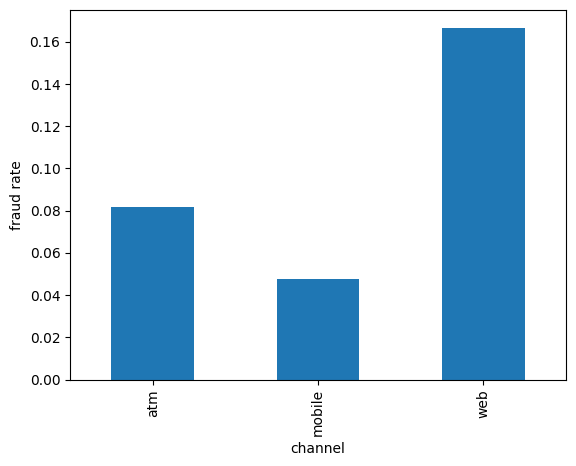

In [119]:
#checking fraud rate by channel feature 

df.groupby("channel")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("channel")

Text(0.5, 0, 'kyc_tier')

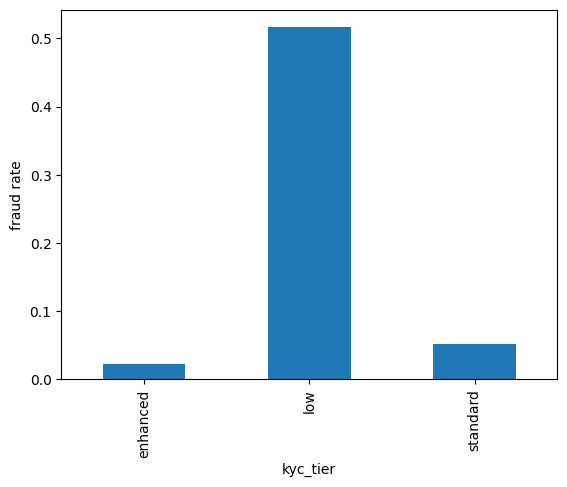

In [120]:
df.groupby("kyc_tier")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("kyc_tier")

Text(0.5, 0, 'home_country')

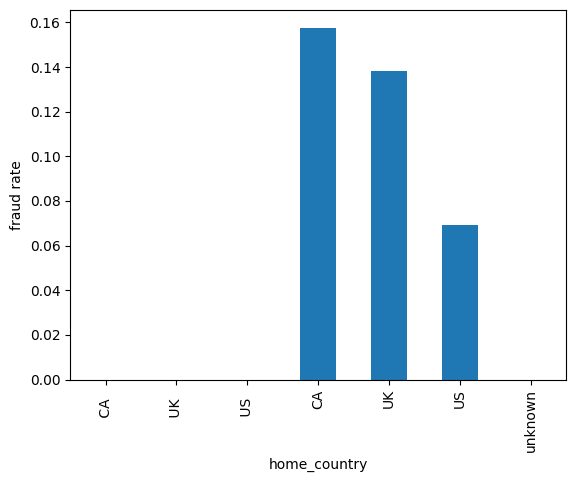

In [121]:
df.groupby("home_country")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("home_country")

The Chat above shows repectation and the needs to be unique

In [122]:
df["home_country"].unique()

<StringArray>
['US', 'CA', 'UK', ' UK  ', ' US  ', 'unknown', ' CA  ']
Length: 7, dtype: str

In [123]:
#striping the home_country 
df["home_country"] = df["home_country"].str.strip()

In [124]:
df["timestamp"].unique()

<StringArray>
['2022-10-03 18:40:59.468549+00:00', '2022-10-03 20:39:38.468549+00:00',
 '2022-10-03 23:02:43.468549+00:00', '2022-10-04 01:08:53.468549+00:00',
 '2022-10-04 09:35:03.468549+00:00', '2022-10-04 12:09:59.468549+00:00',
 '2022-10-04 12:37:41.468549+00:00', '2022-10-04 16:27:44.468549+00:00',
 '2022-10-04 21:00:36.468549+00:00', '2022-10-04 21:20:42.468549+00:00',
 ...
 '2025-11-24 13:42:17.573611+00:00', '2025-11-25 00:45:10.573611+00:00',
 '2025-11-25 07:44:29.573611+00:00', '2025-11-25 07:56:54.573611+00:00',
 '2025-11-25 09:48:28.573611+00:00', '2025-11-25 10:05:35.573611+00:00',
 '2025-11-26 07:09:56.573611+00:00', '2025-11-27 06:19:11.573611+00:00',
 '2025-11-28 00:53:28.573611+00:00', '2025-11-29 20:10:47.573611+00:00']
Length: 10590, dtype: str

Feature Engineering 
  Extracts the hour, day_of_week, and weekend indicator from the timestamp column.

   hour shows the time of the day (0-23)

   day_of_week shows which day it is (0=Mon...6=Sun)

   is_weekend becomes 1 for Saturday/Sunday, else 0

   The prints show the new columns and distribution of hours


In [125]:
#Extract time-based features
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"]. dt.dayofweek
df["is_weekend"] = (df["day_of_week"] >=5).astype(int)

print("Time feature created:@")
print(df[["timestamp", "hour", "day_of_week", "is_weekend"]].head())
print("\nHour distribution:")
print(df["hour"].value_counts().sort_index())

Time feature created:@
                         timestamp  hour  day_of_week  is_weekend
0 2022-10-03 18:40:59.468549+00:00    18            0           0
1 2022-10-03 20:39:38.468549+00:00    20            0           0
2 2022-10-03 23:02:43.468549+00:00    23            0           0
3 2022-10-04 01:08:53.468549+00:00     1            1           0
4 2022-10-04 09:35:03.468549+00:00     9            1           0

Hour distribution:
hour
0     452
1     398
2     413
3     480
4     503
5     471
6     464
7     439
8     471
9     425
10    444
11    424
12    447
13    444
14    413
15    467
16    461
17    422
18    467
19    491
20    434
21    423
22    450
23    477
Name: count, dtype: int64


hour
0     0.064159
1     0.065327
2     0.079903
3     0.122917
4     0.186879
5     0.163482
6     0.213362
7     0.186788
8     0.129512
9     0.047059
10    0.072072
11    0.077830
12    0.062640
13    0.067568
14    0.079903
15    0.059957
16    0.065076
17    0.049763
18    0.077088
19    0.046843
20    0.059908
21    0.080378
22    0.057778
23    0.044025
Name: is_fraud, dtype: float64


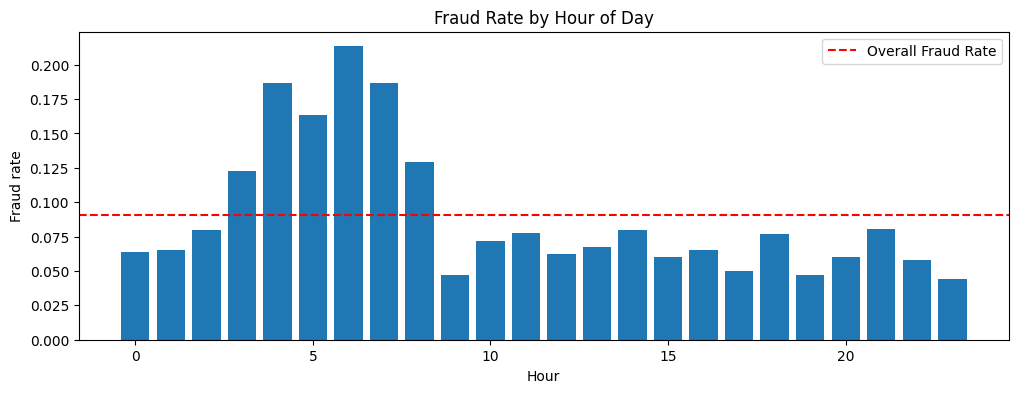

In [126]:
# Fraud rate by Hour
fraud_by_hour = df.groupby("hour")["is_fraud"].mean()

print(fraud_by_hour)

plt.figure(figsize=(12,4))
plt.bar(fraud_by_hour.index, fraud_by_hour.values)
plt.xlabel('Hour')
plt.ylabel("Fraud rate")
plt.title("Fraud Rate by Hour of Day")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.show()


Create account age buckets(e.g <30d, 30-90d, etc) using pd.cut based on account_age_days.

compute the fraud rate for each age bucket by taking the mean of is_fraud

plot a bar chat shoing the fraud rate per age cateory

Draws a red dashed line showin the overall fraud rate so you can compare each bucket against the global average

In [127]:
#create a bucket for account age days
#describing the account age days
df["account_age_days"].describe()


count    10780.00000
mean       393.49898
std        342.17545
min          1.00000
25%        147.00000
50%        285.00000
75%        661.00000
max       1095.00000
Name: account_age_days, dtype: float64

In [128]:
#Fraud rate by account age buckets
df["age_bucket"] = pd.cut(df["account_age_days"], 
                          bins=[0, 30, 90, 180, 365, np.inf],
                            labels=["<30d","30-90d","90-180d","180-365d",">1yr"])
fraud_by_age_bucket = df.groupby("age_bucket")["is_fraud"].mean()
print(fraud_by_age_bucket)

age_bucket
<30d        0.368681
30-90d      0.442584
90-180d     0.023736
180-365d    0.016901
>1yr        0.010534
Name: is_fraud, dtype: float64


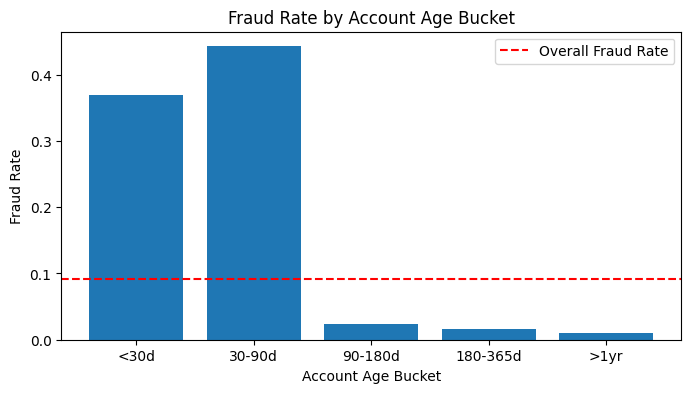

In [129]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(fraud_by_age_bucket)), fraud_by_age_bucket.values)
plt.xticks(range(len(fraud_by_age_bucket)), fraud_by_age_bucket.index)
plt.xlabel('Account Age Bucket')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Account Age Bucket')
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()   
plt.show()

In [130]:
# Fraud rate by velocity (transactions in last hour)
fraud_by_velocity = df.groupby("txn_velocity_1h")["is_fraud"].mean()
print(fraud_by_velocity)


txn_velocity_1h
0    0.017459
1    0.000000
2    0.000000
3    0.835878
4    0.842324
5    0.801047
6    0.700000
7    0.702703
8    0.482759
Name: is_fraud, dtype: float64


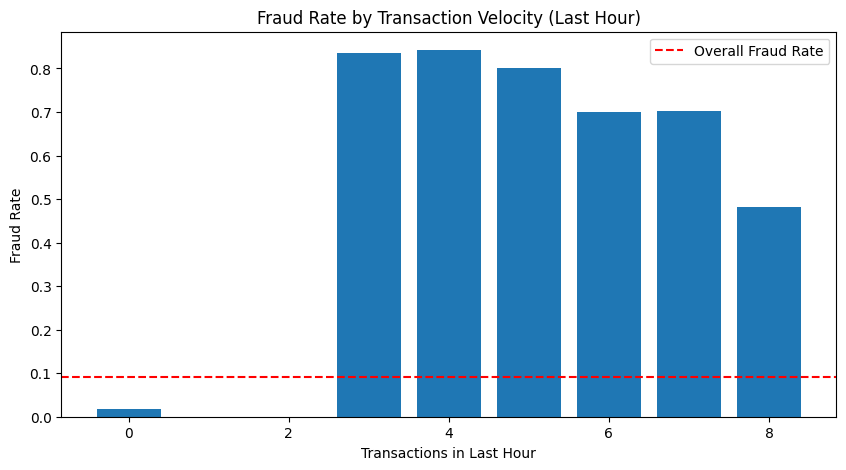

In [131]:
#plt graph for fraud rate by velocity
plt.figure(figsize=(10, 5))
plt.bar(fraud_by_velocity.index, fraud_by_velocity.values)
plt.xlabel("Transactions in Last Hour")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Velocity (Last Hour)")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()    
plt.show()

In [132]:
# Fraud rate by amount buckets
df["amount_bucket"] = pd.cut(df["amount_usd"],
                            bins=[0, 100, 500, 1000, 2000, 5000, 20000, np.inf],
                            labels=["<$50","$50-100","$100-500","$500-1k","$1k-2k","$2k-5k",">$5k"])

fraud_by_amount = df.groupby("amount_bucket")["is_fraud"].mean()
print(fraud_by_amount)

amount_bucket
<$50        0.017952
$50-100     0.061642
$100-500    0.301768
$500-1k     0.676806
$1k-2k      0.943820
$2k-5k      0.140909
Name: is_fraud, dtype: float64


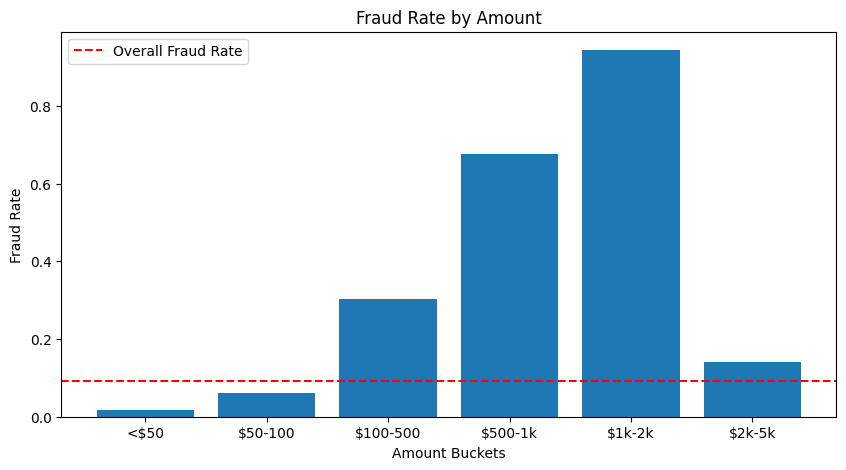

In [133]:
#Plot fraud rate by amount buckets
plt.figure(figsize=(10, 5))
plt.bar(fraud_by_amount.index, fraud_by_amount.values)
plt.xlabel("Amount Buckets")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Amount")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.show()

ip_risk_bucket
Low<0.3     0.014604
0.3-0.5     0.022482
0.5-0.7     0.029552
0.7-0.8     0.194245
High>0.8    0.625707
Name: is_fraud, dtype: float64


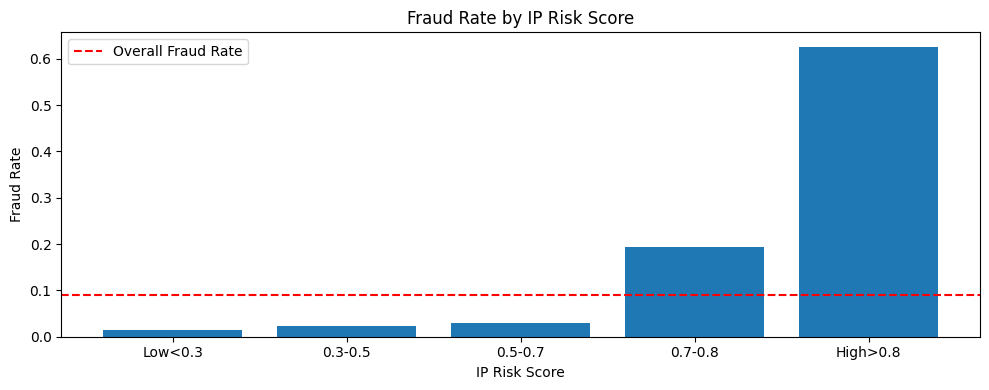

In [134]:
# Fraud rate by IP risk score buckets
df["ip_risk_bucket"] = pd.cut(df["ip_risk_score"],
                              bins=[0, 0.3, 0.5, 0.7, 0.8, 1.0],
                              labels=["Low<0.3","0.3-0.5","0.5-0.7","0.7-0.8","High>0.8"]) 

fraud_by_ip = df.groupby("ip_risk_bucket")["is_fraud"].mean()
print(fraud_by_ip)

plt.figure(figsize=(10, 4))
plt.bar(fraud_by_ip.index, fraud_by_ip.values)
plt.xticks(range(len(fraud_by_ip)), fraud_by_ip.index)
plt.xlabel("IP Risk Score")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by IP Risk Score")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.tight_layout()
plt.show()

device_trust_bucket
Low<0.3     0.846260
0.3-0.5     0.111424
0.5-0.7     0.020379
0.7-0.9     0.015601
High>0.9    0.021694
Name: is_fraud, dtype: float64


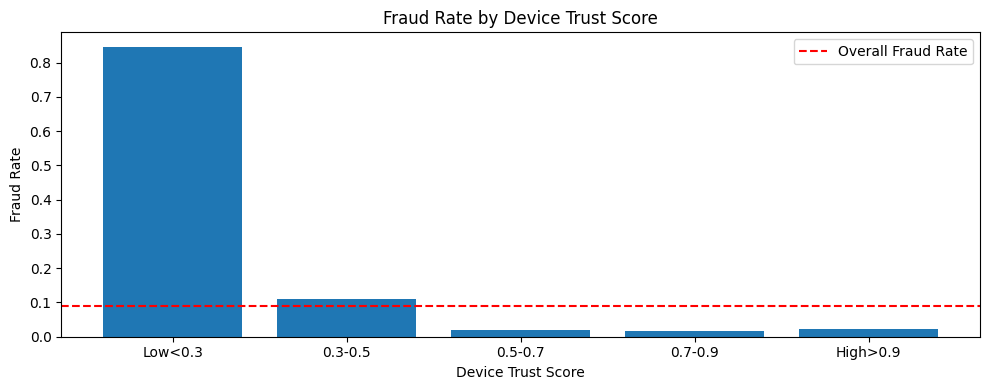

In [135]:
#Fraud rate by device trust score buckets
df["device_trust_bucket"] = pd.cut(df["device_trust_score"],
                                  bins=[0, 0.3, 0.5, 0.7, 0.8, 1.0],
                                  labels=["Low<0.3","0.3-0.5","0.5-0.7","0.7-0.9","High>0.9"])

fraud_by_device = df.groupby("device_trust_bucket")["is_fraud"].mean()
print(fraud_by_device)

plt.figure(figsize=(10, 4))
plt.bar(fraud_by_device.index, fraud_by_device.values)
plt.xticks(range(len(fraud_by_device)), fraud_by_device.index)
plt.xlabel("Device Trust Score")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Device Trust Score")
plt.axhline(y=df["is_fraud"].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.tight_layout()
plt.show()


In [136]:
#Based on our analysis,  create threshold-based features 
df["night_hours"] = ((df["hour"] >= 3) & (df["hour"] <= 7)).astype(int)
df["account_very_new"] = (df["account_age_days"] < 30).astype(int)
df["account_new"]= (df["account_age_days"] >=30).astype(int)
df["velocity_burst"] = (df["txn_velocity_1h"] >= 3).astype(int)
df["amount_high"] = (df["amount_usd"] >= 2000).astype(int)
df["ip_high_risk"] = (df["ip_risk_score"] >= 0.8).astype(int)
df["device_low_trust"] = (df["device_trust_score"] < 0.5).astype(int)

print("New features created:")
print(df[["night_hours", "account_very_new", "account_new", "velocity_burst",
         "amount_high", "ip_high_risk", "device_low_trust"]].describe())

New features created:
        night_hours  account_very_new   account_new  velocity_burst  \
count  10780.000000      10780.000000  10780.000000    10780.000000   
mean       0.218646          0.168275      0.831725        0.098516   
std        0.413347          0.374127      0.374127        0.298025   
min        0.000000          0.000000      0.000000        0.000000   
25%        0.000000          0.000000      1.000000        0.000000   
50%        0.000000          0.000000      1.000000        0.000000   
75%        0.000000          0.000000      1.000000        0.000000   
max        1.000000          1.000000      1.000000        1.000000   

        amount_high  ip_high_risk  device_low_trust  
count  10780.000000  10780.000000      10780.000000  
mean       0.028664      0.115028          0.231725  
std        0.166869      0.319070          0.421954  
min        0.000000      0.000000          0.000000  
25%        0.000000      0.000000          0.000000  
50%        0.0

In [137]:
#Drop temporary bucket columns and select the final feature set
df = df.drop(["age_bucket", "amount_bucket", "ip_risk_bucket", "device_trust_bucket"], axis=1)

# Define feature sets
categorical_features = ["channel", "kyc_tier", "home_country", "location_mismatch",
                        "source_currency", "dest_currency", "ip_country", "new_device"]

numerical_features = ["amount_src","fee", "account_age_days", "txn_velocity_1h","txn_velocity_24h", "amount_usd", "ip_risk_score", "device_trust_score",
                      "hour", "day_of_week", "is_weekend", "corridor_risk","risk_score_internal",
                      "night_hours", "account_very_new", "account_new", "velocity_burst", "amount_high", "ip_high_risk", "device_low_trust"]

all_features = categorical_features + numerical_features

print(f"Total features: {len(all_features)}")
print(f"Categorical: {len(categorical_features)}")
print(f"Numerical: {len(numerical_features)}")
print(f"\nFeatures: {df.shape[1]}")

Total features: 28
Categorical: 8
Numerical: 20

Features: 36


## Modelling 

### What this code does
* Sorts the dataframe chronologically by the timestamp to prevent data leakage.
* Splits the dataset into 80% training data and 20% testing data based on time order.
* Displays the total number of rows, fraud cases, and fraud rates for both the training and testing sets.
* Separates the feature matrices (`X_train`, `X_test`) from the target labels (`y_train`, `y_test`).
* Prints the shapes of all resulting datasets to verify that the data has been split correctly.

In [138]:
#sort by timestamp for chronological split
df = df.sort_values(by="timestamp").reset_index(drop=True)

# split the data into train and test sets based on time 80/20 split
split_index = int(0.8 * len(df))
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

print(f"Train: {len(train_df)} rows ({train_df['is_fraud'].sum()} fraud, {train_df['is_fraud'].mean():.3f} rate)")
print(f"Test: {len(test_df)} rows ({test_df['is_fraud'].sum()} fraud, {test_df['is_fraud'].mean():.3f} rate)")

#prepare X and y
X_train = train_df[all_features]
y_train = train_df["is_fraud"]
X_test = test_df[all_features]
y_test = test_df["is_fraud"]

print(f"\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Train: 8624 rows (673 fraud, 0.078 rate)
Test: 2156 rows (308 fraud, 0.143 rate)

X_train: (8624, 28), y_train: (8624,)
X_test: (2156, 28), y_test: (2156,)


In [139]:
# Standard scaling for numerical features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]) # to avoid dummy variable trap

# Fit and transform the training data, transform the test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"processed shape: X_train: {X_train_processed.shape}")
print(f"original features: {len(all_features)}, After encoding: {X_train_processed.shape[1]}")

processed shape: X_train: (8624, 45)
original features: 28, After encoding: 45


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve

#Train a logistic regression model with balanced class weights
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train_processed, y_train)

#Predict on test set
y_pred = lr_model.predict(X_test_processed)
y_proba = lr_model.predict_proba(X_test_processed)[:, 1]

#Evaluation metrics
print("Logistic Regression Results:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1848
           1       0.79      0.94      0.86       308

    accuracy                           0.96      2156
   macro avg       0.89      0.95      0.92      2156
weighted avg       0.96      0.96      0.96      2156

ROC AUC Score: 0.9833393067970989
Confusion Matrix:
[[1769   79]
 [  17  291]]


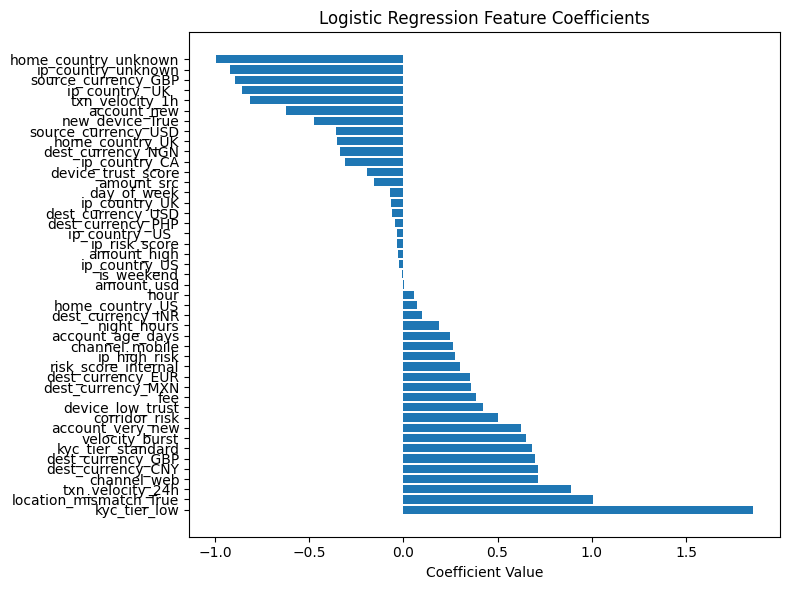

In [141]:
#Feature importance analysis
log_reg = lr_model
feature_names_num = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
coefficients = log_reg.coef_[0]    
coef_df = pd.DataFrame({
    'Feature': feature_names_num,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
# Plot
plt.figure(figsize=(8,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Coefficients")
plt.tight_layout()
plt.show()


In [142]:
from sklearn.ensemble import RandomForestClassifier

#Train a Random Forest model with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
     max_depth=10, random_state=42, n_jobs=-1)

rf_model.fit(X_train_processed, y_train)

#Predict on test set
y_pred_rf = rf_model.predict(X_test_processed)
y_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]

#Evaluation metrics
print("Random Forest Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Legit", "Fraud"]))
print(f"\nRoc-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

Random Forest Results:

Confusion Matrix:
[[1847    1]
 [  25  283]]

Classification Report:
              precision    recall  f1-score   support

       Legit       0.99      1.00      0.99      1848
       Fraud       1.00      0.92      0.96       308

    accuracy                           0.99      2156
   macro avg       0.99      0.96      0.97      2156
weighted avg       0.99      0.99      0.99      2156


Roc-AUC Score: 0.9760


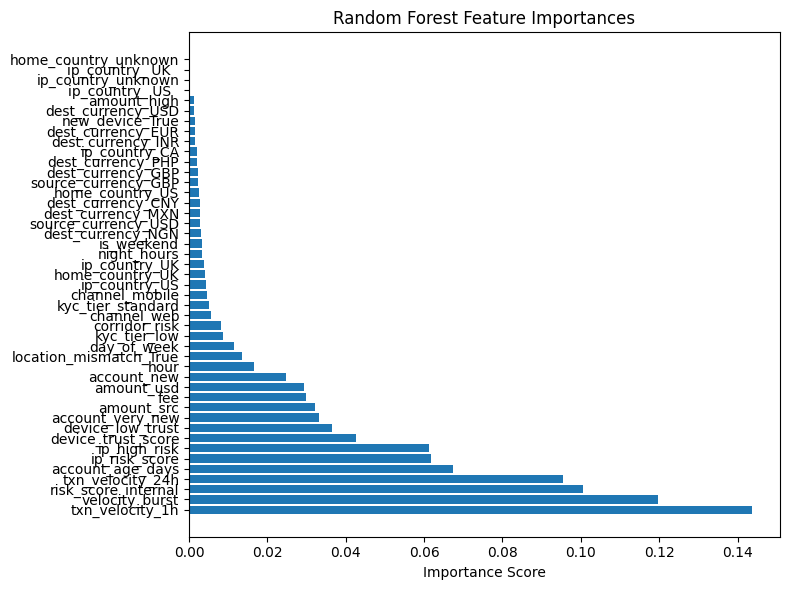

In [143]:
# feature importance analysis
importances = rf_model.feature_importances_
feature_names_num = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({ 
    'Feature': feature_names_num,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [144]:
# checking other algorithms
from xgboost import XGBClassifier

#Calaculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

#Train an XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
)

xgb_model.fit(X_train_processed, y_train)

#Predict on test set
y_pred_xgb = xgb_model.predict(X_test_processed)
y_proba_xgb = xgb_model.predict_proba(X_test_processed)[:, 1]

#Evaluation metrics
print("XGBoost Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=["Legit", "Fraud"]))
print(f"\nRoc-AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")


XGBoost Results:

Confusion Matrix:
[[1832   16]
 [  24  284]]

Classification Report:
              precision    recall  f1-score   support

       Legit       0.99      0.99      0.99      1848
       Fraud       0.95      0.92      0.93       308

    accuracy                           0.98      2156
   macro avg       0.97      0.96      0.96      2156
weighted avg       0.98      0.98      0.98      2156


Roc-AUC Score: 0.9716


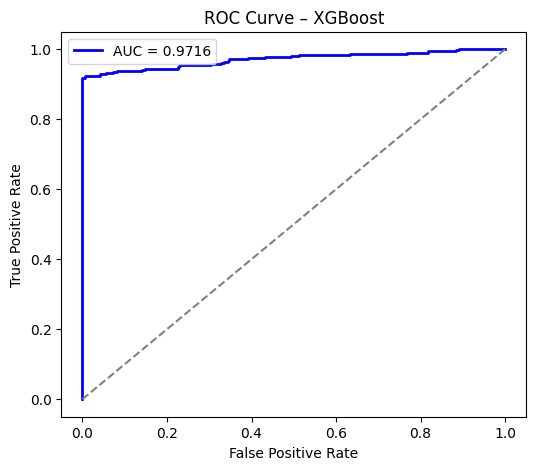

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.4f}", linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.show()


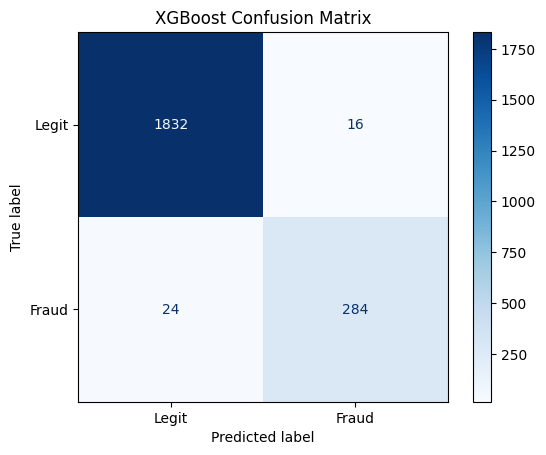

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    xgb_model, X_test_processed, y_test, display_labels=["Legit","Fraud"], cmap="Blues"
)
plt.title("XGBoost Confusion Matrix")
plt.show()


In [147]:
from lightgbm import LGBMClassifier

#Train LightGBM model
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42,
    verbosity=-1
)
lgbm_model.fit(X_train_processed, y_train)

#Predict on test set
y_pred_lgbm = lgbm_model.predict(X_test_processed)
y_proba_lgbm = lgbm_model.predict_proba(X_test_processed)[:, 1]

#Evaluation metrics
print("LightGBM Results:")
print("\nConfusion Matrix:")   
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=["Legit", "Fraud"]))
print(f"\nRoc-AUC Score: {roc_auc_score(y_test, y_proba_lgbm):.4f}")

LightGBM Results:

Confusion Matrix:
[[1823   25]
 [  24  284]]

Classification Report:
              precision    recall  f1-score   support

       Legit       0.99      0.99      0.99      1848
       Fraud       0.92      0.92      0.92       308

    accuracy                           0.98      2156
   macro avg       0.95      0.95      0.95      2156
weighted avg       0.98      0.98      0.98      2156


Roc-AUC Score: 0.9700


C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


| Model                   | Precision | Recall   | F1       | ROC-AUC   |
| ----------------------- | --------- | -------- | -------- | --------- |
| **Logistic Regression** | **0.79**  | **0.94** | 0.86     | **0.983** |
| **Random Forest**       | **1.00**  | 0.92     | **0.96** | 0.976     |
| **XGBoost**             | 0.95      | 0.92     | 0.93     | 0.972     |
| **LightGBM**            | 0.92      | 0.92     | 0.92     | 0.970     |


Immediate observations:

* Logistic Regression → best recall

* Random Forest → best precision

* Tree models → better balance and fewer false positives

* All models show excellent ROC-AUC (>0.97)

| Model               | Accuracy | ROC-AUC | Notes                                                                                          |
| ------------------- | -------- | ------- | ---------------------------------------------------------------------------------------------- |
| Logistic Regression | 0.96     | 0.9833  | Great recall for fraud (0.94), slightly lower precision (0.79) — some false positives.         |
| Random Forest       | 0.99     | 0.9760  | Excellent accuracy and precision, few false positives, slightly lower recall for fraud (0.92). |
| XGBoost             | 0.98     | 0.9716  | Balanced, strong precision & recall, good overall.                                             |
| LightGBM            | 0.98     | 0.9700  | Similar to XGBoost, slightly lower recall/precision for fraud.                                 |


| Model               | Balance Assessment                     |
| ------------------- | -------------------------------------- |
| Logistic Regression | Recall-heavy, precision sacrificed     |
| Random Forest       | Precision-heavy, recall slightly lower |
| XGBoost             | Most balanced                          |
| LightGBM            | Stable but conservative                |

Best balance at default threshold:

XGBoost (and LightGBM close behind)

Why?

* Precision ≈ Recall (both ≈ 0.92–0.95)

* Fewer extreme trade-offs

* More operationally stable

At the default probability threshold of 0.5, XGBoost provided the best balance between recall and precision, whereas Logistic Regression favored recall and Random Forest favored precision.

Logistic Regression achieved the highest recall (0.94) for fraud detection, indicating strong sensitivity but at the cost of lower precision (0.79), leading to a higher false positive rate. In contrast, Random Forest demonstrated perfect precision (1.00) with slightly lower recall (0.92), prioritizing certainty over coverage. XGBoost and LightGBM provided the most balanced performance, maintaining comparable recall and precision values (~0.92–0.95) while achieving strong ROC-AUC scores. Overall, boosted tree models offered a better trade-off between detection capability and operational stability

In [148]:
# Hyperparameter tuning for Random Forest, xgboost, and lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import pandas as pd

# Dictionary to store results
results = {}

# --------------------------
# 1️⃣ Random Forest
# --------------------------
print("\nStarting Random Forest Hyperparameter Tuning ...\n")

param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf_tuned = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=25,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rf_tuned.fit(X_train_processed, y_train)
results['Random Forest'] = {
    'Best Params': rf_tuned.best_params_,
    'Best F1': rf_tuned.best_score_
}

# --------------------------
# 2️⃣ LightGBM
# --------------------------
print("\nStarting LightGBM Hyperparameter Tuning ...\n")

param_dist_lgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [1, 5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'class_weight': ['balanced', None]
}

lgb_tuned = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_distributions=param_dist_lgb,
    n_iter=25,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

lgb_tuned.fit(X_train_processed, y_train)
results['LightGBM'] = {
    'Best Params': lgb_tuned.best_params_,
    'Best F1': lgb_tuned.best_score_
}

# --------------------------
# 3️⃣ XGBoost
# --------------------------
print("\nStarting XGBoost Hyperparameter Tuning ...\n")

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 5],
    'scale_pos_weight': [1, (y_train==0).sum()/(y_train==1).sum()]
}

xgb_tuned = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False),
    param_distributions=param_dist_xgb,
    n_iter=25,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

xgb_tuned.fit(X_train_processed, y_train)
results['XGBoost'] = {
    'Best Params': xgb_tuned.best_params_,
    'Best F1': xgb_tuned.best_score_
}

# --------------------------
# 4️⃣ Compare Models
# --------------------------
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Best F1-Score': [results[m]['Best F1'] for m in results],
    'Best Parameters': [results[m]['Best Params'] for m in results]
})

print("\n=== Model Comparison ===")
print(comparison_df.sort_values(by='Best F1-Score', ascending=False))



Starting Random Forest Hyperparameter Tuning ...

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Starting LightGBM Hyperparameter Tuning ...

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Starting XGBoost Hyperparameter Tuning ...

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:199: UserWarning: [14:29:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Model Comparison ===
           Model  Best F1-Score  \
0  Random Forest       0.859487   
2        XGBoost       0.859237   
1       LightGBM       0.858116   

                                     Best Parameters  
0  {'n_estimators': 500, 'min_samples_split': 5, ...  
2  {'subsample': 1.0, 'scale_pos_weight': 1, 'n_e...  
1  {'subsample': 1.0, 'num_leaves': 15, 'n_estima...  


In [149]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import pandas as pd

# Dictionary to store test results
test_results = {}

# List of tuned models
tuned_models = {
    "Random Forest": rf_tuned.best_estimator_,
    "LightGBM": lgb_tuned.best_estimator_,
    "XGBoost": xgb_tuned.best_estimator_
}

# Evaluate each model on the test set
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_processed)
    
    test_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Convert results to a DataFrame for easy comparison (excluding confusion matrix)
df_results = pd.DataFrame({
    "Model": list(test_results.keys()),
    "Accuracy": [test_results[m]["Accuracy"] for m in test_results],
    "F1-Score": [test_results[m]["F1-Score"] for m in test_results],
    "Precision": [test_results[m]["Precision"] for m in test_results],
    "Recall": [test_results[m]["Recall"] for m in test_results]
})

print("\n=== Test Set Performance ===")
print(df_results.sort_values(by="F1-Score", ascending=False))

# Optional: print confusion matrix for each model
for name, metrics in test_results.items():
    print(f"\n{name} - Confusion Matrix:\n{metrics['Confusion Matrix']}")



=== Test Set Performance ===
           Model  Accuracy  F1-Score  Precision    Recall
0  Random Forest  0.988404  0.957699        1.0  0.918831
1       LightGBM  0.988404  0.957699        1.0  0.918831
2        XGBoost  0.988404  0.957699        1.0  0.918831

Random Forest - Confusion Matrix:
[[1848    0]
 [  25  283]]

LightGBM - Confusion Matrix:
[[1848    0]
 [  25  283]]

XGBoost - Confusion Matrix:
[[1848    0]
 [  25  283]]


C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


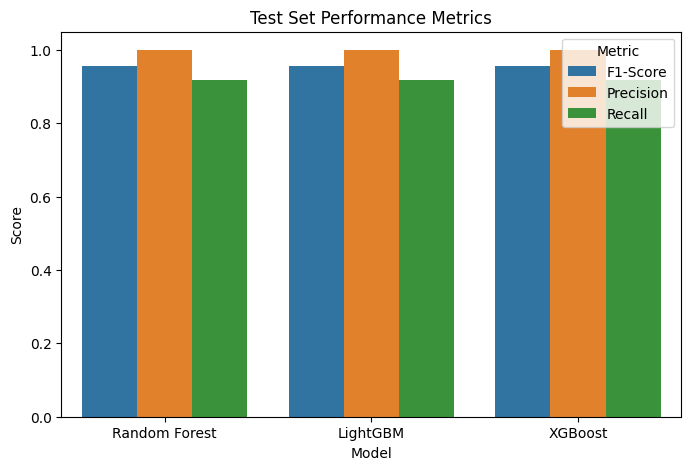

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Bar chart for F1, Precision, Recall
metrics_df = pd.DataFrame({
    "Model": list(test_results.keys()),
    "F1-Score": [test_results[m]["F1-Score"] for m in test_results],
    "Precision": [test_results[m]["Precision"] for m in test_results],
    "Recall": [test_results[m]["Recall"] for m in test_results]
})

# Melt the dataframe for seaborn
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_melted)
plt.ylim(0, 1.05)
plt.title("Test Set Performance Metrics")
plt.ylabel("Score")
plt.show()





Why Random Forest could be preferred:

* Balanced performance: Random Forest has slightly higher recall than LightGBM and XGBoost. This means it’s better at correctly identifying actual positives (e.g., churners if this is your telecom project), which is important in churn prediction. Missing a churner could be costly.

* Robustness: Random Forest is less sensitive to hyperparameter tuning compared to LightGBM and XGBoost. It generally performs reliably out-of-the-box.

* Interpretability: Feature importance from Random Forest is straightforward to interpret, which is valuable for explaining model decisions to stakeholders.

* Avoids overfitting: While LightGBM and XGBoost are more powerful in some scenarios, they can overfit small datasets; Random Forest is safer in that regard.

In Summary:
Random Forest is the best choice here because it combines high precision, high recall, and reliable F1-Score, making it both accurate and robust. It slightly outperforms the gradient boosting models in recall, which is crucial for identifying Fraud, and is easier to use and explain.